In [84]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

В документации библиотеки scikit learn найдите, как загрузить датасет для построения модели прогноза прогрессирования заболевания через год после исходного уровня.

Выведите содержимое поля DESCR, которое вернет функция, загружающая датасет, чтобы изучить содержимое датасета.

Подготовьте данные к обучению моделей: отделите целевой признак от датасета, разделите датасет на тренировочную и валидационную части.

Обучите решающее дерево и оцените адекватность обученной модели. Для этого достаточно сравнить метрики качества с метриками, получаемыми от простой модели. Например, если бы мы подавали на вход среднее значение целевой переменной на обучающей части выборки.

Обучите линейную регрессию и оцените ее адекватность.

Выберите лучшую модель и обоснуйте свой выбор.

In [85]:
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [86]:
df = load_diabetes(as_frame=True).frame

In [87]:
df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
314,-0.023677,-0.044642,0.040140,-0.012556,-0.009825,-0.001001,-0.002903,-0.002592,-0.011897,-0.038357,147.0
339,0.027178,-0.044642,-0.007284,-0.050427,0.075484,0.056619,0.033914,-0.002592,0.043444,0.015491,95.0
292,0.009016,-0.044642,-0.022373,-0.032077,-0.049727,-0.068641,0.078093,-0.070859,-0.062917,-0.038357,84.0
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,230.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [89]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [90]:
features = df.drop(['target'], axis = 1)
target = df['target']
print(features.shape)
print(target.shape)

(442, 10)
(442,)


In [91]:
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [92]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

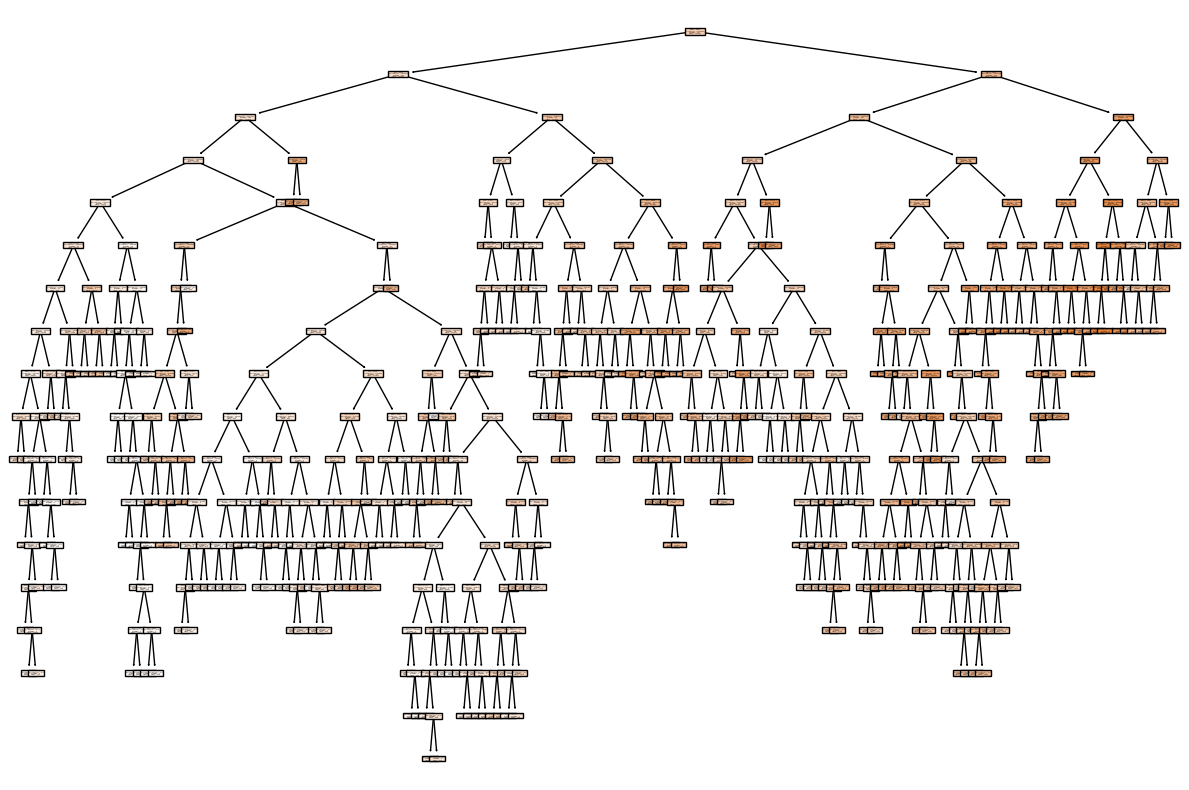

In [93]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=features.columns)
plt.show()

In [94]:
# Прогнозируем результаты модели на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем среднее значение целевой переменной на обучающей части данных
y_train_mean = np.full(shape=y_test.shape, fill_value=y_train.mean())

# Вычисляем метрики для модели
mse_model = mean_squared_error(y_test, y_pred)
mse_mean = mean_squared_error(y_test, y_train_mean)
mae_model = mean_absolute_error(y_test, y_pred)
mae_mean = mean_absolute_error(y_test, y_train_mean)
r2_model = r2_score(y_test, y_pred)
r2_mean = r2_score(y_test, y_train_mean)
rmse_model = mean_squared_error(y_test, y_pred, squared=False)
rmse_mean = mean_squared_error(y_test, y_train_mean, squared=False)

print("For the Decision Tree model: ")
print("MSE: ", mse_model)
print("RMSE: ", rmse_model)
print("MAE: ", mae_model)
print("R²: ", r2_model)

print("\nFor the 'mean' model: ")
print("MSE: ", mse_mean)
print("RMSE: ", rmse_mean)
print("MAE: ", mae_mean)
print("R²: ", r2_mean)

For the Decision Tree model: 
MSE:  6207.924242424242
RMSE:  78.79038166187699
MAE:  61.56060606060606
R²:  -0.2139491674920757

For the 'mean' model: 
MSE:  5155.017075267711
RMSE:  71.7984475825746
MAE:  62.04295380994411
R²:  -0.008054937939272255


Метрические показатели для модели регрессии, основанной на решающем дереве, уступают простой модели, которая всегда возвращала среднее значение обучающей выборки.

In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)

In [96]:
y_pred = lr_model.predict(X_test)
mse_model = mean_squared_error(y_test, y_pred)
mse_mean = mean_squared_error(y_test, y_train_mean)
mae_model = mean_absolute_error(y_test, y_pred)
mae_mean = mean_absolute_error(y_test, y_train_mean)
r2_model = r2_score(y_test, y_pred)
r2_mean = r2_score(y_test, y_train_mean)
rmse_model = mean_squared_error(y_test, y_pred, squared=False)
rmse_mean = mean_squared_error(y_test, y_train_mean, squared=False)

print("For the Linear Regression model: ")
print("MSE: ", mse_model)
print("RMSE: ", rmse_model)
print("MAE: ", mae_model)
print("R²: ", r2_model)

print("\nFor the 'mean' model: ")
print("MSE: ", mse_mean)
print("RMSE: ", rmse_mean)
print("MAE: ", mae_mean)
print("R²: ", r2_mean)

For the Linear Regression model: 
MSE:  2499.3212346817413
RMSE:  49.9932118860325
MAE:  38.21668137234904
R²:  0.5112619269090264

For the 'mean' model: 
MSE:  5155.017075267711
RMSE:  71.7984475825746
MAE:  62.04295380994411
R²:  -0.008054937939272255


Метрические показатели для модели регрессии, основанной линейной регрессии превосходят простую модель, которая всегда возвращала среднее значение обучающей выборки.

Вывод: линейная регрессионная модель является предпочтительным выбором, благодаря своим высоким метрикам качества.